# Dia 8 — Tipos de Machine Learning

Este notebook mostra exemplos de **aprendizado supervisionado** e **não supervisionado** com explicações didáticas.

## Aprendizado Supervisionado

No aprendizado supervisionado, usamos **dados rotulados** (entrada + saída esperada) para treinar um modelo.

Exemplo: Classificação das flores Iris usando **KNN**.

In [1]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo supervisionado: KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Acurácia (Aprendizado Supervisionado):", accuracy_score(y_test, y_pred))


Acurácia (Aprendizado Supervisionado): 1.0


## Aprendizado Não Supervisionado

No aprendizado não supervisionado, temos apenas **entradas** (sem rótulos). O modelo deve encontrar **padrões ocultos**.

Exemplo: **KMeans** para clusterizar pontos em grupos.

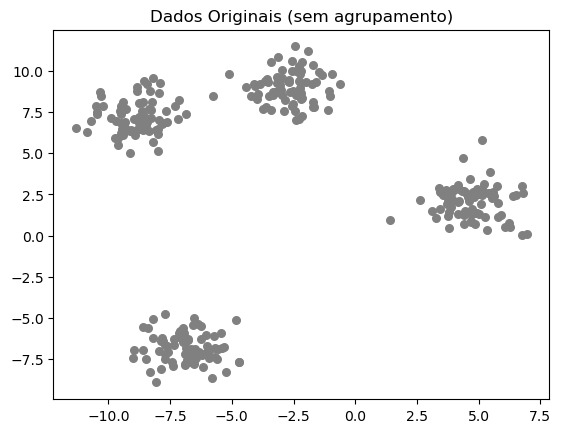

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


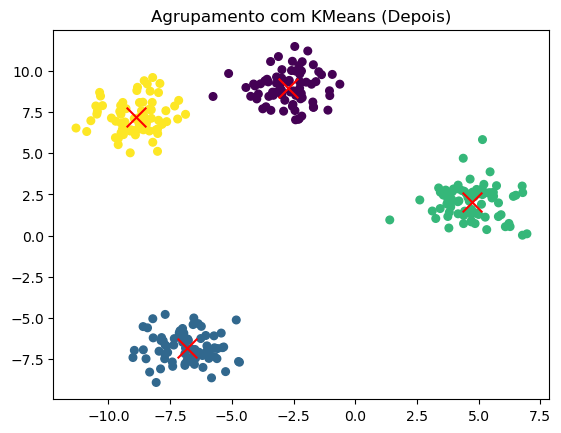

Rótulos atribuídos (primeiros 20): [3 3 0 1 3 1 2 1 0 2 0 2 0 0 3 0 3 2 0 0]


In [2]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Criar dados artificiais
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Antes do KMeans
plt.scatter(X[:, 0], X[:, 1], c="gray", s=30)
plt.title("Dados Originais (sem agrupamento)")
plt.show()

# Modelo não supervisionado: KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Depois do KMeans
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="x", s=200)
plt.title("Agrupamento com KMeans (Depois)")
plt.show()

# Mostrar primeiros rótulos
print("Rótulos atribuídos (primeiros 20):", labels[:20])


## Métrica de Qualidade — Silhouette

O **coeficiente de silhueta** mede o quão bem os clusters estão definidos:
- Próximo de 1 → clusters bem separados.
- Próximo de 0 → clusters sobrepostos.
- Negativo → pontos em clusters errados.

In [3]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Coeficiente de Silhueta:", score)

Coeficiente de Silhueta: 0.7915830011443039


## Conclusão
- **Supervisionado (KNN):** treinamos com dados rotulados e medimos a acurácia.
- **Não supervisionado (KMeans):** agrupamos pontos sem rótulos, obtendo clusters matematicamente definidos.
- O algoritmo não apenas 'coloriu' os pontos: cada ponto recebeu uma **categoria numérica** e os centroides foram calculados matematicamente.
- O coeficiente de **silhueta** valida a qualidade do agrupamento.

Fiquei curioso se havia jeito de melhorar o coeficiênte e ao pesquisar obtiver a resposta abaixo, futuramente irei me aprofundar e conferir, o foco atual é ter uma base e assim ir a expandindo.

# 🔧 Métodos para melhorar o coeficiente de silhueta

O coeficiente de silhueta mede a qualidade dos clusters em termos de **coesão** (quão próximos estão os pontos dentro do mesmo cluster) e **separação** (quão distantes estão de outros clusters). Ele varia entre:

$$ 
-1 \leq s \leq 1
$$

- \( s \approx 1 \): clusters bem definidos  
- \( s \approx 0 \): sobreposição entre clusters  
- \( s < 0 \): pontos mal alocados  

---

## 1. Escolha do número de clusters (\(k\))

O **KMeans** exige definir `n_clusters`.  
Muitas vezes, um valor diferente de \(k\) aumenta a silhueta.

**Técnicas úteis:**
- **Método do cotovelo (Elbow Method)**  
- **Silhouette Analysis**: rodar para vários \(k\) e escolher o maior valor médio

---

## 2. Escalonamento dos dados

Variáveis em escalas diferentes distorcem as distâncias.  
É recomendável aplicar normalização:
### StandardScaler
$$
x' = \frac{x - \mu}{\sigma}
$$
*Média = 0, desvio padrão = 1*

### MinMaxScaler
$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$
*Normaliza para o intervalo [0,1]*

---

## 3. Remover ruídos e outliers

Outliers podem puxar o centroide para longe.  
Técnicas para lidar com eles:
- **Isolation Forest**  
- **DBSCAN** (pontos ruidosos são marcados como -1)  
- **Remoção manual de pontos extremos**

---

## 4. Testar outros algoritmos de clustering

O **KMeans** é bom para clusters **esféricos** e de tamanho parecido.  
Se os grupos forem **irregulares** ou de densidade variável:

- **DBSCAN**: baseado em densidade  
- **Hierarchical Clustering**: organiza em árvore de clusters

---

## 5. Engenharia de features

Às vezes, transformar os dados ou reduzir dimensionalidade ajuda.

Exemplo:  
**PCA (Principal Component Analysis)** antes do clustering pode melhorar a silhueta ao projetar os dados em um espaço de menor dimensão mais informativo.
 espaço de menor dimensão mais informativo.

